# Implements a 2 x 2 Quadratic Funding Game Example with discrete contributions
2 contributors and 2 projects

In [1]:
import pandas as pd

In [2]:
def qf(contributions):
  '''contributions: list of contributions'''
  return sum([c**0.5 for c in contributions])**2

def match(targetqflist, D):
  '''
  targetqflist: list of targetqfs, ordered by the project
  D: donor funds'''
  totalrequiredfunds=sum(targetqflist)
  if totalrequiredfunds<=D:
    return targetqflist
  else:
    return [round((qf/totalrequiredfunds)*D,2) for qf in targetqflist]



In [3]:
def matchesfromcontributions(agentscontributions,D):
  '''
  agentscontributions is a list of contributions [{'A':10,'B':20},{'A':0,'B':5}]
  '''
  contributionstoA=[c['A'] for c in agentscontributions] #contributions to project A
  contributionstoB=[c['B'] for c in agentscontributions] #contributions to project B
  targetqftoA=qf(contributionstoA)
  targetqftoB=qf(contributionstoB)
  return match([targetqftoA,targetqftoB],D)




In [4]:
def U1A(fa):
  return 4*(fa**0.5)
def U1B(fb):
  return 2*(fb**0.5)

def U2A(fa):
  return 2*(fa**0.5)
def U2B(fb):
  return 4*(fb**0.5)

def utilities(agentscontributions,D):
  flist=matchesfromcontributions(agentscontributions,D)
  c1=agentscontributions[0]
  c2=agentscontributions[1]
  utility1=U1A(flist[0])+U1B(flist[1])-(c1['A']+c1['B'])
  utility2=U2A(flist[0])+U2B(flist[1])-(c2['A']+c2['B'])
  #return {1:utility1,2:utility2}
  return (round(utility1,2),round(utility2,2))




In [5]:
c1={'A':1,'B':2}
c2={'A':100,'B':100}
print(matchesfromcontributions([c1,c2],100))
#print(utilities([c1,c2],100))
utilities([c1,c2],100)


[48.15, 51.85]


(39.16, -157.32)

In [6]:
strategies1=[]
strategies2=[]
for i in [0,1,4]:
  for j in [0,1,4]:
    #print(i,j)
    strategies1.append({'A':i,'B':j})
    strategies2.append({'A':i,'B':j})
strategies1
strategies2

[{'A': 0, 'B': 0},
 {'A': 0, 'B': 1},
 {'A': 0, 'B': 4},
 {'A': 1, 'B': 0},
 {'A': 1, 'B': 1},
 {'A': 1, 'B': 4},
 {'A': 4, 'B': 0},
 {'A': 4, 'B': 1},
 {'A': 4, 'B': 4}]

In [7]:
strategies1

[{'A': 0, 'B': 0},
 {'A': 0, 'B': 1},
 {'A': 0, 'B': 4},
 {'A': 1, 'B': 0},
 {'A': 1, 'B': 1},
 {'A': 1, 'B': 4},
 {'A': 4, 'B': 0},
 {'A': 4, 'B': 1},
 {'A': 4, 'B': 4}]

# Payoffs (utility - costs)

In [8]:
#each key in the dict is an s2 strategy
#each value is the corresponding list of utilities both get (for each s1 strategy) 
d={str(s2): [utilities([s1,s2],8) for s1 in strategies1] for s2 in strategies2}
df = pd.DataFrame(data=d, index=strategies1)
print('Payoff Matrix')
df


Payoff Matrix


,"{'A': 0, 'B': 0}","{'A': 0, 'B': 1}","{'A': 0, 'B': 4}","{'A': 1, 'B': 0}","{'A': 1, 'B': 1}","{'A': 1, 'B': 4}","{'A': 4, 'B': 0}","{'A': 4, 'B': 1}","{'A': 4, 'B': 4}"
"{'A': 0, 'B': 0}","(0.0, 0.0)","(2.0, 3.0)","(4.0, 4.0)","(4.0, 1.0)","(6.0, 4.0)","(8.0, 5.0)","(8.0, 0.0)","(10.0, 3.0)","(12.0, 4.0)"
"{'A': 0, 'B': 1}","(1.0, 4.0)","(3.0, 7.0)","(4.66, 7.31)","(5.0, 5.0)","(7.0, 8.0)","(7.94, 7.52)","(9.0, 4.0)","(11.0, 7.0)","(9.98, 4.55)"
"{'A': 0, 'B': 4}","(0.0, 8.0)","(1.66, 10.31)","(1.66, 7.31)","(4.0, 9.0)","(4.94, 10.52)","(4.23, 7.35)","(8.0, 8.0)","(6.98, 7.55)","(6.12, 4.65)"
"{'A': 1, 'B': 0}","(3.0, 2.0)","(5.0, 5.0)","(7.0, 6.0)","(7.0, 3.0)","(9.0, 6.0)","(11.0, 7.0)","(10.31, 1.66)","(11.52, 3.94)","(11.55, 2.98)"
"{'A': 1, 'B': 1}","(4.0, 6.0)","(6.0, 9.0)","(6.94, 8.52)","(8.0, 7.0)","(10.0, 10.0)","(8.98, 7.55)","(10.52, 4.94)","(10.55, 5.98)","(10.0, 4.0)"
"{'A': 1, 'B': 4}","(3.0, 10.0)","(3.94, 11.52)","(3.23, 8.35)","(7.0, 11.0)","(5.98, 10.55)","(5.12, 7.65)","(7.55, 6.98)","(7.0, 7.0)","(6.31, 4.45)"
"{'A': 4, 'B': 0}","(4.0, 4.0)","(6.0, 7.0)","(8.0, 8.0)","(7.31, 4.66)","(8.52, 6.94)","(8.55, 5.98)","(7.31, 1.66)","(8.35, 3.23)","(8.65, 2.12)"
"{'A': 4, 'B': 1}","(5.0, 8.0)","(7.0, 11.0)","(5.98, 8.55)","(7.52, 7.94)","(7.55, 8.98)","(7.0, 7.0)","(7.35, 4.23)","(7.65, 5.12)","(7.45, 3.31)"
"{'A': 4, 'B': 4}","(4.0, 12.0)","(2.98, 11.55)","(2.12, 8.65)","(4.55, 9.98)","(4.0, 10.0)","(3.31, 7.45)","(4.65, 6.12)","(4.45, 6.31)","(4.0, 4.0)"


In [9]:
utilities([{'A': 0, 'B': 1},{'A': 0, 'B': 0}],20)

(1.0, 4.0)

# Public good allocations [FA,FB]

In [10]:
## QF matchs (only for reference)
matchesfromcontributions
d={str(s2): [matchesfromcontributions([s1,s2],8) for s1 in strategies1] for s2 in strategies2}
df = pd.DataFrame(data=d, index=strategies1)
print('Public Goods Allocation Matrix [FA,FB]')
df

Public Goods Allocation Matrix [FA,FB]


,"{'A': 0, 'B': 0}","{'A': 0, 'B': 1}","{'A': 0, 'B': 4}","{'A': 1, 'B': 0}","{'A': 1, 'B': 1}","{'A': 1, 'B': 4}","{'A': 4, 'B': 0}","{'A': 4, 'B': 1}","{'A': 4, 'B': 4}"
"{'A': 0, 'B': 0}","[0.0, 0.0]","[0.0, 1.0]","[0.0, 4.0]","[1.0, 0.0]","[1.0, 1.0]","[1.0, 4.0]","[4.0, 0.0]","[4.0, 1.0]","[4.0, 4.0]"
"{'A': 0, 'B': 1}","[0.0, 1.0]","[0.0, 4.0]","[0.0, 8.0]","[1.0, 1.0]","[1.0, 4.0]","[0.8, 7.2]","[4.0, 1.0]","[4.0, 4.0]","[2.46, 5.54]"
"{'A': 0, 'B': 4}","[0.0, 4.0]","[0.0, 8.0]","[0.0, 8.0]","[1.0, 4.0]","[0.8, 7.2]","[0.47, 7.53]","[4.0, 4.0]","[2.46, 5.54]","[1.6, 6.4]"
"{'A': 1, 'B': 0}","[1.0, 0.0]","[1.0, 1.0]","[1.0, 4.0]","[4.0, 0.0]","[4.0, 1.0]","[4.0, 4.0]","[8.0, 0.0]","[7.2, 0.8]","[5.54, 2.46]"
"{'A': 1, 'B': 1}","[1.0, 1.0]","[1.0, 4.0]","[0.8, 7.2]","[4.0, 1.0]","[4.0, 4.0]","[2.46, 5.54]","[7.2, 0.8]","[5.54, 2.46]","[4.0, 4.0]"
"{'A': 1, 'B': 4}","[1.0, 4.0]","[0.8, 7.2]","[0.47, 7.53]","[4.0, 4.0]","[2.46, 5.54]","[1.6, 6.4]","[5.54, 2.46]","[4.0, 4.0]","[2.88, 5.12]"
"{'A': 4, 'B': 0}","[4.0, 0.0]","[4.0, 1.0]","[4.0, 4.0]","[8.0, 0.0]","[7.2, 0.8]","[5.54, 2.46]","[8.0, 0.0]","[7.53, 0.47]","[6.4, 1.6]"
"{'A': 4, 'B': 1}","[4.0, 1.0]","[4.0, 4.0]","[2.46, 5.54]","[7.2, 0.8]","[5.54, 2.46]","[4.0, 4.0]","[7.53, 0.47]","[6.4, 1.6]","[5.12, 2.88]"
"{'A': 4, 'B': 4}","[4.0, 4.0]","[2.46, 5.54]","[1.6, 6.4]","[5.54, 2.46]","[4.0, 4.0]","[2.88, 5.12]","[6.4, 1.6]","[5.12, 2.88]","[4.0, 4.0]"


# Reaction functions analysis

Project A:
$$ 
\frac{\sum\sqrt c_i^A}{\sqrt{c_1^A}}V_1^{'A}(.)-1=0 \text{ if } F^A+F^B\leq D\\
V_1^{'A}(.)- 
\sum_{p'=A,B}V_1^{'p'}(.)\frac{F^{p',\text{QF}}}{(F^{A,QF}+F^{B,QF})}=\frac{\sqrt{c_1^A}}{\sqrt{c_1^A}+\sqrt{c_2^A}}\bigg(\frac{F^A+F^B}{D}\bigg) \text{ if } F^A+F^B>D $$

Project B:
$$ 
\frac{\sum\sqrt c_i^B}{\sqrt{c_1^B}}V_1^{'B}(.)-1=0 \text{ if } F^A+F^B\leq D\\
V_1^{'B}(.)- 
\sum_{p'=A,B}V_1^{'p'}(.)\frac{F^{p',\text{QF}}}{(F^{A,QF}+F^{B,QF})}=\frac{\sqrt{c_1^B}}{\sqrt{c_1^B}+\sqrt{c_2^B}}\bigg(\frac{F^A+F^B}{D}\bigg) \text{ if } F^A+F^B>D$$

In [60]:
@np.vectorize
def equationA(c1a,c1b,c2a,c2b,D):

  def U1Aprime(fa):
    return 2*(fa**-0.5)
  def U1Bprime(fb):
    return (fb**-0.5)

  FA=((c1a**0.5)+(c2a**0.5))**2
  FB=((c1b**0.5)+(c2b**0.5))**2
  #print(FA)
  #print(FB)
  
  requiredD=FA+FB
  #print(requiredD>D)
  
  if requiredD>D:
    fa=D*(FA/(FA+FB))
    fb=D*(FB/(FA+FB))
    LHS=U1Aprime(fa)-U1Aprime(fa)*(FA/(FA+FB))-U1Bprime(fb)*(FB/(FA+FB))
    RHS=((c1a**0.5)/((c1a**0.5)+(c2a**0.5)))*((FA+FB)/D)
    return LHS-RHS
  else:
    fa=FA
    fb=FB
    LHS=(((c1a**0.5)+(c2a**0.5))/(c1a**0.5))*U1Aprime(fa)
    RHS=1
    return LHS-RHS

@np.vectorize
def equationB(c1a,c1b,c2a,c2b,D):

  def U1Aprime(fa):
    return 2*(fa**-0.5)
  def U1Bprime(fb):
    return (fb**-0.5)

  FA=((c1a**0.5)+(c2a**0.5))**2
  FB=((c1b**0.5)+(c2b**0.5))**2
  requiredD=FA+FB
  if requiredD>D:
    fa=D*(FA/(FA+FB))
    fb=D*(FB/(FA+FB))

    LHS=U1Bprime(fa)-U1Aprime(fa)*(FA/(FA+FB))-U1Bprime(fb)*(FB/(FA+FB))
    RHS=((c1b**0.5)/((c1b**0.5)+(c2b**0.5)))*((FA+FB)/D)
    return LHS-RHS
  else:
    fa=FA
    fb=FB
    LHS=(((c1b**0.5)+(c2b**0.5))/(c1b**0.5))*U1Bprime(fb)
    RHS=1
    return LHS-RHS
  




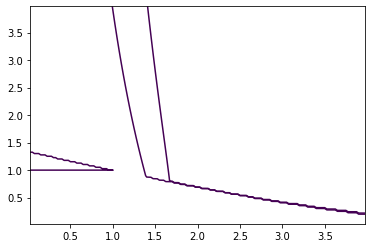

In [98]:
import matplotlib.pyplot as plt

import numpy as np
delta=0.025
c1a,c1b=np.meshgrid(np.arange(0.025,4,delta),np.arange(0.025,4,delta))

plt.contour(c1a,c1b,equationA(c1a,c1b,0,4,10),[0])
plt.contour(c1a,c1b,equationB(c1a,c1b,0,4,10),[0])

plt.show()


In [86]:
utilities([{'A': 4, 'B': 1},{'A': 0, 'B': 1}],8)
    

(7.0, 11.0)

In [82]:
matchesfromcontributions([{'A': 1.5, 'B': 0.4},{'A': 0, 'B': 4}],8)

[1.42, 6.58]